In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/DiplomadoEPM_2019/master/Modulo3/init.py
from init import init; init(force_download=False)

In [1]:
try:
    %tensorflow_version 2.x
    print ("Using TF2 in Google Colab")
except:
    pass
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import *
tf.__version__

'2.1.0'

# Sequential API

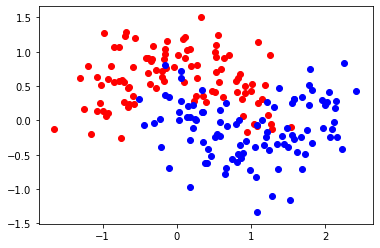

In [2]:
X, y = make_moons(200, noise=.3)

plt.scatter(X[:,0][y==0], X[:,1][y==0], color="red", label="class 0")
plt.scatter(X[:,0][y==1], X[:,1][y==1], color="blue", label="class 1")

In [37]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(2)))
model.add(tf.keras.layers.Dense(10, activation="tanh"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(X,y, epochs=1000, batch_size=len(X), verbose=0)

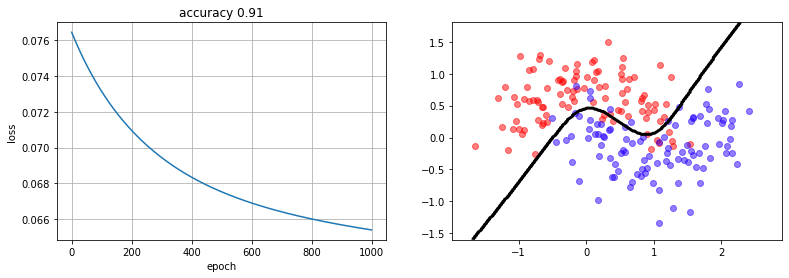

In [40]:
predict = lambda X: (model.predict(X)[:,0]>.5).astype(int)
preds = predict(X)

plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(k.history["loss"])
plt.xlabel("epoch"); plt.ylabel("loss"); plt.grid();
plt.title("accuracy %.2f"%np.mean(preds==y));
plt.subplot(122)
mlutils.plot_2Ddata_with_boundary(predict, X,y);


# Functional API

In [13]:
inputs  = tf.keras.layers.Input(shape=(2))
hidden  = tf.keras.layers.Dense(10, activation="tanh")(inputs)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(hidden)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [17]:
k = model.fit(X,y, epochs=1000, batch_size=len(X), verbose=0)

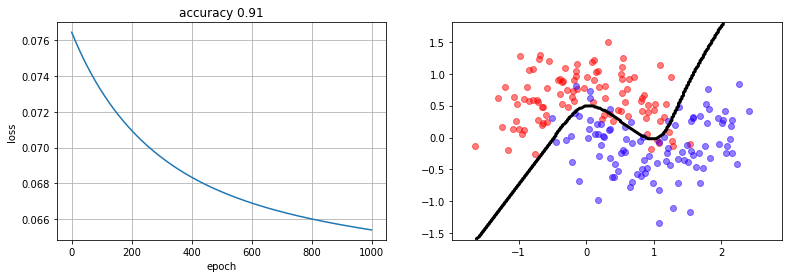

In [33]:
predict = lambda X: (model.predict(X)[:,0]>.5).astype(int)
preds = predict(X)

plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(k.history["loss"])
plt.xlabel("epoch"); plt.ylabel("loss"); plt.grid();
plt.title("accuracy %.2f"%np.mean(preds==y));
plt.subplot(122)
mlutils.plot_2Ddata_with_boundary(predict, X,y);

# Dropout

In [34]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(2)))
model.add(tf.keras.layers.Dense(10, activation="tanh"))
model.add(tf.keras.layers.Dropout(.1))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [35]:
model.fit(X,y, epochs=1000, batch_size=len(X), verbose=0)

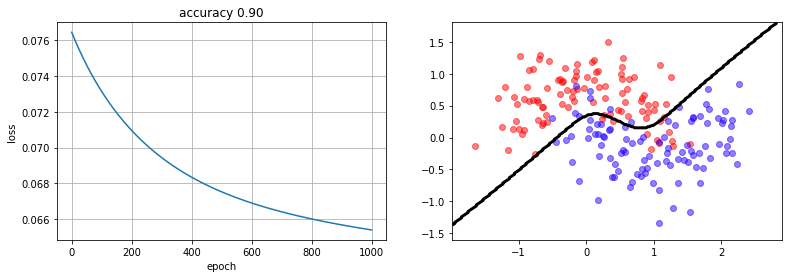

In [36]:
predict = lambda X: (model.predict(X)[:,0]>.5).astype(int)
preds = predict(X)

plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(k.history["loss"])
plt.xlabel("epoch"); plt.ylabel("loss"); plt.grid();
plt.title("accuracy %.2f"%np.mean(preds==y));
plt.subplot(122)
mlutils.plot_2Ddata_with_boundary(predict, X,y);